In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import pandas as pd
import numpy as np
from data import clean_and_split_nba_data as clean
from models import plot_validation_curve as vc
from src.models import eval_model as evm
import xgboost as xgb
from hyperopt import Trials, STATUS_OK, tpe, hp, fmin
%load_ext autoreload
%autoreload 2

In [2]:
df = pd.read_csv("../data/raw/train.csv")
df

,Id_old,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,10556,3799,80,24.3,7.8,3.0,6.4,45.7,0.1,0.3,...,2.9,72.1,2.2,2.0,3.8,3.2,1.1,0.2,1.6,1
1,5342,3800,75,21.8,10.5,4.2,7.9,55.1,-0.3,-1.0,...,3.6,67.8,3.6,3.7,6.6,0.7,0.5,0.6,1.4,1
2,5716,3801,85,19.1,4.5,1.9,4.5,42.8,0.4,1.2,...,0.6,75.7,0.6,1.8,2.4,0.8,0.4,0.2,0.6,1
3,13790,3802,63,19.1,8.2,3.5,6.7,52.5,0.3,0.8,...,1.5,66.9,0.8,2.0,3.0,1.8,0.4,0.1,1.9,1
4,5470,3803,63,17.8,3.7,1.7,3.4,50.8,0.5,1.4,...,0.5,54.0,2.4,2.7,4.9,0.4,0.4,0.6,0.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,2996,11794,32,9.2,1.8,0.7,1.8,40.3,-0.1,-0.2,...,0.6,65.7,0.3,1.8,1.9,0.5,0.3,0.2,0.4,1
7996,11679,11795,54,6.0,1.8,0.7,1.4,48.7,0.1,0.1,...,0.4,70.1,1.0,1.1,2.0,0.1,0.0,0.3,0.3,1
7997,5537,11796,85,28.2,10.7,4.0,9.0,45.1,0.2,0.6,...,3.9,69.7,1.0,2.1,3.1,3.4,1.2,0.2,1.8,1
7998,1292,11797,39,7.7,2.5,1.0,2.3,40.1,-0.3,-0.5,...,0.7,74.3,0.4,0.6,0.9,0.2,0.3,0.3,0.5,1


In [3]:
x_data, x_train, x_val, x_test, y_data , y_train, y_val,  y_test = clean.clean_and_split_nba_data(df,True)

Index(['GP', 'MIN', 'PTS', 'FGM', 'FGA', '3P Made', '3PA', 'FTM', 'FTA',
       'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'CALC3P%', 'CALCFG%',
       'CALCFT%'],
      dtype='object')


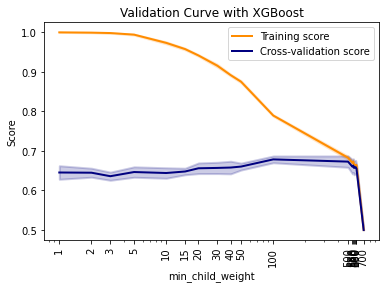

In [4]:
vc.plot_validation_curve(estimator=xgb.XGBClassifier(random_state=8, verbosity=1,use_label_encoder=False,objective ='binary:logistic',eval_metric='auc'),
                    hyperparameter='min_child_weight',
                    hyperparameter_value=[1,2,3,5,10,15,20,30,40,50,100,500,550,560,570,580,590,600,700],
                    x=x_data,
                    y=y_data,
                    title="XGBoost",
                    cv=5)

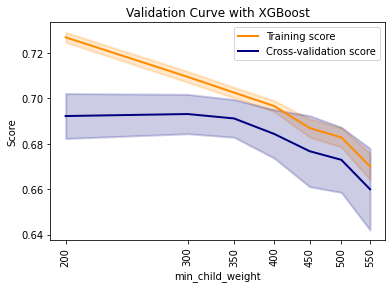

In [5]:
vc.plot_validation_curve(estimator=xgb.XGBClassifier(random_state=8, 
                                                     verbosity=1,
                                                     use_label_encoder=False,
                                                     objective ='binary:logistic',
                                                     eval_metric='auc'),
                    hyperparameter='min_child_weight',
                    hyperparameter_value=[200,300,350,400,450,500,550],
                    x=x_data,
                    y=y_data,
                    title="XGBoost",
                    cv=5)

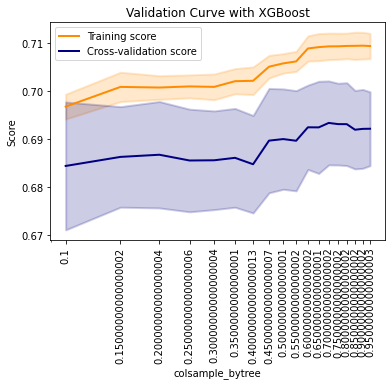

In [6]:
vc.plot_validation_curve(estimator=xgb.XGBClassifier(random_state=8, 
                                                     verbosity=1,
                                                     use_label_encoder=False,
                                                     objective ='binary:logistic',
                                                     eval_metric='auc',
                                                    min_child_weight=300
                                                    
                                                    ),
                    hyperparameter='colsample_bytree',
                    hyperparameter_value=np.arange( 0.1, 1.0, 0.05),
                    x=x_data,
                    y=y_data,
                    title="XGBoost",
                    cv=5)

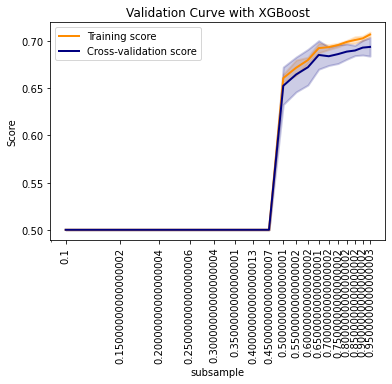

In [7]:
vc.plot_validation_curve(estimator=xgb.XGBClassifier(random_state=8, 
                                                     verbosity=1,
                                                     use_label_encoder=False,
                                                     objective ='binary:logistic',
                                                     eval_metric='auc',
                                                    min_child_weight=300,
                                                    
                                                    ),
                    hyperparameter='subsample',
                    hyperparameter_value=np.arange( 0.1, 1.0, 0.05),
                    x=x_data,
                    y=y_data,
                    title="XGBoost",
                    cv=5)

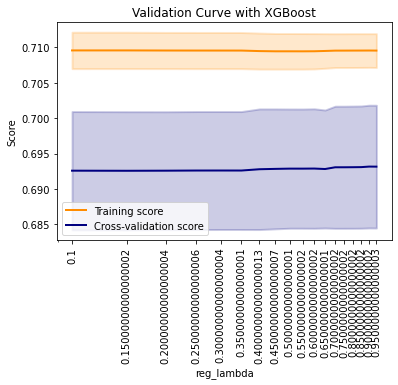

In [8]:
vc.plot_validation_curve(estimator=xgb.XGBClassifier(random_state=8, 
                                                     verbosity=1,
                                                     use_label_encoder=False,
                                                     objective ='binary:logistic',
                                                     eval_metric='auc',
                                                    min_child_weight=300                                                   
                                                    ),
                    hyperparameter='reg_lambda',
                    hyperparameter_value=np.arange( 0.1, 1.0, 0.05),
                    x=x_data,
                    y=y_data,
                    title="XGBoost",
                    cv=5)

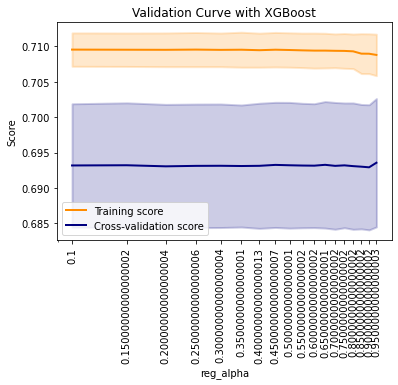

In [9]:
vc.plot_validation_curve(estimator=xgb.XGBClassifier(random_state=8, 
                                                     verbosity=1,
                                                     use_label_encoder=False,
                                                     objective ='binary:logistic',
                                                     eval_metric='auc',
                                                    min_child_weight=300
                                                    
                                                    ),
                    hyperparameter='reg_alpha',
                    hyperparameter_value=np.arange( 0.1, 1.0, 0.05),
                    x=x_data,
                    y=y_data,
                    title="XGBoost",
                    cv=5)

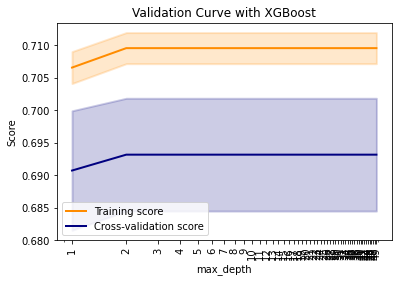

In [10]:
vc.plot_validation_curve(estimator=xgb.XGBClassifier(random_state=8, 
                                                     verbosity=1,
                                                     use_label_encoder=False,
                                                     objective ='binary:logistic',
                                                     eval_metric='auc',
                                                    min_child_weight=300                                                    
                                                    ),
                    hyperparameter='max_depth',
                    hyperparameter_value=range(1,50,1),
                    x=x_data,
                    y=y_data,
                    title="XGBoost",
                    cv=5)

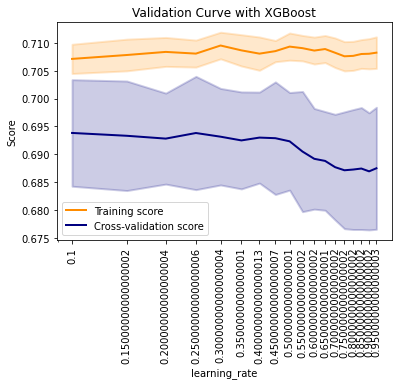

In [11]:
vc.plot_validation_curve(estimator=xgb.XGBClassifier(random_state=8, 
                                                     verbosity=1,
                                                     use_label_encoder=False,
                                                     objective ='binary:logistic',
                                                     eval_metric='auc',
                                                    min_child_weight=300                                                    
                                                    ),
                    hyperparameter='learning_rate',
                    hyperparameter_value=np.arange( 0.1, 1.0, 0.05),
                    x=x_data,
                    y=y_data,
                    title="XGBoost",
                    cv=5)

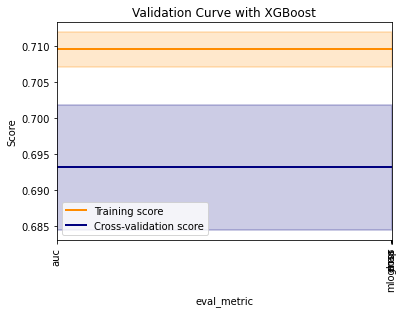

In [12]:
vc.plot_validation_curve(estimator=xgb.XGBClassifier(random_state=8, 
                                                     verbosity=1,
                                                     use_label_encoder=False,
                                                     objective ='binary:logistic',
                                                    min_child_weight=300                                                    
                                                    ),
                    hyperparameter='eval_metric',
                    hyperparameter_value=['auc','error','mlogloss','map'],
                    x=x_data,
                    y=y_data,
                    title="XGBoost",
                    cv=5)

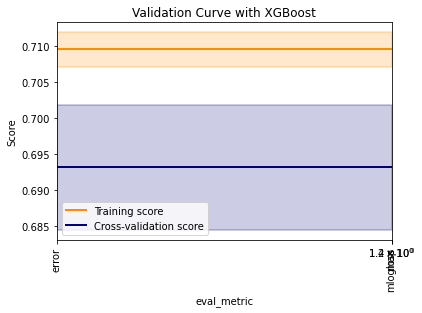

In [13]:
vc.plot_validation_curve(estimator=xgb.XGBClassifier(random_state=8, 
                                                     verbosity=1,
                                                     use_label_encoder=False,
                                                     objective ='binary:logistic',
                                                    min_child_weight=300                                                    
                                                    ),
                    hyperparameter='eval_metric',
                    hyperparameter_value=['error','mlogloss','map'],
                    x=x_data,
                    y=y_data,
                    title="XGBoost",
                    cv=5)

c:\users\xauspi\.virtualenvs\kaggle_assignment-dq2gjalz\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\xauspi\.virtualenvs\kaggle_assignment-dq2gjalz\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


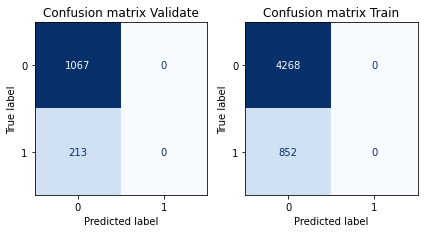

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=300, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=8, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=1)


(XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
               gamma=0, gpu_id=-1, importance_type='gain',
               interaction_constraints='', learning_rate=0.300000012,
               max_delta_step=0, max_depth=6, min_child_weight=300, missing=nan,
               monotone_constraints='()', n_estimators=100, n_jobs=8,
               num_parallel_tree=1, random_state=8, reg_alpha=0, reg_lambda=1,
               scale_pos_weight=1, subsample=1, tree_method='exact',
               use_label_encoder=False, validate_parameters=1, verbosity=1),
 0.7107209014788513,
 0.685039006296448)

In [14]:
xgboost1=xgb.XGBClassifier(random_state=8, 
                verbosity=1,
                use_label_encoder=False,
                objective ='binary:logistic',
                eval_metric='auc',
                min_child_weight=300)
evm.eval_model(xgboost1,x_train,y_train,x_val,y_val)

c:\users\xauspi\.virtualenvs\kaggle_assignment-dq2gjalz\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.6995623428887059, 0.83375, 0.0, 0.0, 0.0, 0.83375)

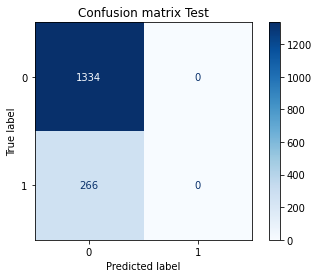

In [15]:
evm.get_performance(xgboost1, x_test, y_test, "Test", True)